<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/WoE_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"
     

/content
mkdir: cannot create directory ‘gdrive’: File exists
/content/gdrive
mkdir: cannot create directory ‘My Drive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [3]:
%cd /content/gdrive/My Drive/Data/

/content/gdrive/My Drive/Data


In [4]:
import scorecardpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline
random.seed(251256517)

In [5]:
df_train = pd.read_csv("Train.csv",index_col=0, low_memory=False)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848276 entries, 0 to 1280644
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   848276 non-null  float64
 1   term                        848276 non-null  object 
 2   installment                 848276 non-null  float64
 3   home_ownership              848276 non-null  object 
 4   annual_inc                  848276 non-null  float64
 5   purpose                     848276 non-null  object 
 6   title                       848276 non-null  object 
 7   zip_code                    848276 non-null  object 
 8   addr_state                  848276 non-null  object 
 9   dti                         848276 non-null  float64
 10  delinq_2yrs                 848276 non-null  float64
 11  earliest_cr_line            848276 non-null  object 
 12  fico_range_low              848276 non-null  float64
 13  fico_range_hi

In [7]:
df_train.head()

,loan_amnt,term,installment,home_ownership,annual_inc,purpose,title,zip_code,addr_state,dti,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default,coborrower_inc,bank_dlq,il_acc,payment_history,collateral_coverage_ratio
0,24700.0,36 months,820.28,MORTGAGE,65000.0,small_business,Business,577xx,SD,16.06,...,314017.0,39475.0,79300.0,24667.0,0,0.0,0,1,0.631895,0.998664
2,20000.0,36 months,631.26,MORTGAGE,85000.0,major_purchase,Major purchase,293xx,SC,17.61,...,193390.0,27937.0,14500.0,36144.0,0,0.0,0,1,0.666333,1.807200
6,18000.0,60 months,471.70,RENT,150000.0,debt_consolidation,Debt consolidation,916xx,CA,9.39,...,65819.0,36247.0,10300.0,31319.0,1,0.0,0,1,0.740741,1.739944
8,16000.0,60 months,379.39,MORTGAGE,48000.0,credit_card,Credit card refinancing,297xx,SC,33.18,...,298100.0,31329.0,281300.0,13400.0,0,0.0,1,1,0.367947,0.837500
10,6000.0,36 months,186.61,MORTGAGE,100000.0,debt_consolidation,Debt consolidation,750xx,TX,13.28,...,156354.0,22741.0,3800.0,36083.0,0,0.0,1,1,0.812000,6.013833


In [21]:
print(df_train.dtypes)

loan_amnt                     float64
term                           object
installment                   float64
home_ownership                 object
annual_inc                    float64
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
application_type               object
dti_joint                     float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_bal_il                  float64
il_util                       float64
acc_open_pas

In [22]:
df_train['home_ownership']. unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [8]:
# Group 1 
group1_vars = ['loan_amnt', 'term', 'installment', 'home_ownership', 'annual_inc']

# Group 2
group2_vars = ['purpose', 'title', 'zip_code', 'addr_state', 'dti']

# Group 3
group3_vars = ['delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths']

# Group 4
group4_vars = ['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']


In [9]:
def preprocess_data(df):
    # Convert non-numeric columns to string
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    df[non_numeric_cols] = df[non_numeric_cols].astype('str')
    
    # Create dummy variables for categorical columns
    df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

    # Convert numeric columns to float and replace NaNs with a suitable value
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].astype('float64')
    df[numeric_cols] = df[numeric_cols].fillna(-999999)

    return df


In [ ]:
df_train_preprocessed = preprocess_data(df_train.copy())

In [10]:
bins = sc.woebin(df_train, y='Default',
                 x='loan_amnt',  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:11


{'loan_amnt': <Figure size 432x288 with 2 Axes>}

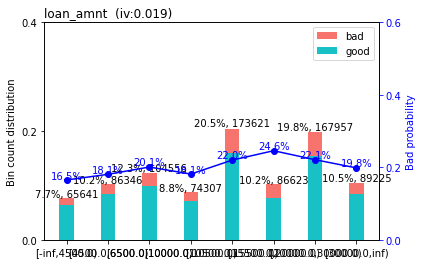

In [11]:
import seaborn as sns

sc.woebin_plot(bins)